In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [2]:
# Load the data
df = pd.read_csv('default of credit card clients.csv')

# Display the data types of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   GENDER                      30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [3]:
df.head()


,LIMIT_BAL,GENDER,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,2,2,2,46,8,7,6,5,4,...,19617,18737,18148,0,0,0,0,0,0,0
1,50000,2,2,2,25,8,7,6,5,4,...,36374,35229,34365,0,0,1000,0,0,3000,1
2,20000,2,3,1,24,8,7,6,5,4,...,22719,21796,21162,0,0,0,0,0,0,0
3,30000,1,2,2,29,8,7,6,5,4,...,32391,31332,30558,0,0,0,0,0,0,0
4,20000,1,2,2,24,8,7,6,5,4,...,22757,21834,21200,0,0,0,0,0,0,0


In [4]:
df = df.dropna()

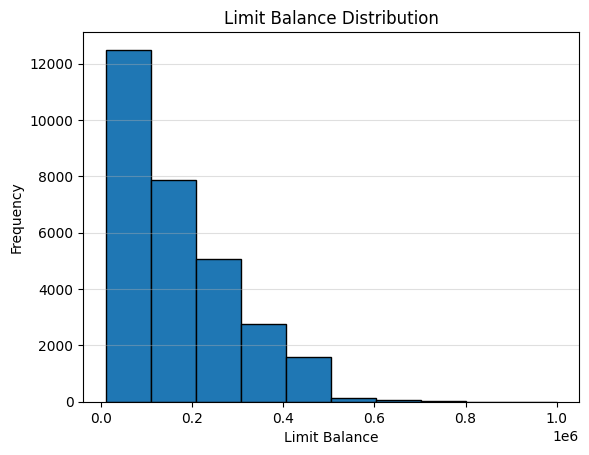

In [8]:
df['LIMIT_BAL'] = df['LIMIT_BAL'].astype('category')

# Display the distribution of Limit Balance
plt.hist(df['LIMIT_BAL'] ,edgecolor='black')
plt.title('Limit Balance Distribution')
plt.xlabel('Limit Balance')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.4)
plt.show()

In [5]:
df["default payment next month"].value_counts()

default payment next month
0    23364
1     6636
Name: count, dtype: int64

In [6]:
X = df.iloc[:, 0:22]
y = df.iloc[:, 23]

print(X)
print(y)

       LIMIT_BAL  GENDER  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  \
0          20000       2          2         2   46      8      7      6   
1          50000       2          2         2   25      8      7      6   
2          20000       2          3         1   24      8      7      6   
3          30000       1          2         2   29      8      7      6   
4          20000       1          2         2   24      8      7      6   
...          ...     ...        ...       ...  ...    ...    ...    ...   
29995     230000       1          1         2   44     -2     -1     -1   
29996     260000       1          1         2   33     -2     -2     -2   
29997     180000       1          1         1   32     -2     -2     -2   
29998      20000       1          2         1   44     -2     -2     -2   
29999     240000       1          1         2   30     -2     -2     -2   

       PAY_4  PAY_5  ...  BILL_AMT2  BILL_AMT3  BILL_AMT4  BILL_AMT5  \
0          5      4  ...   

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

model = DecisionTreeClassifier(random_state=80,criterion='entropy')
model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=80)

In [8]:
print(model.classes_)

[0 1]


In [9]:
plt.figure(figsize=(48,24))
plot_tree(model, feature_names=X.columns, class_names=['No', 'Yes'], filled=True)
plt.show()

KeyboardInterrupt: 